In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from rich import print as pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from quantumion.datastruct.analog import (
    PauliX,
    PauliY,
    PauliZ,
    AnalogCircuit,
    AnalogGate,
)
from quantumion.backend.analog.python.qutip import QutipBackend
from quantumion.backend.task import Task, TaskArgsAnalog, TaskResultAnalog
from quantumion.backend.metric import Expectation, EntanglementEntropyVN
from quantumion.backend.provider import Provider

c:\Users\Salieri\miniconda3\envs\frostenv\lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [4]:
circuit = AnalogCircuit()
gate = AnalogGate(
    duration=1.0,
    hamiltonian=[np.pi * PauliX],
    dissipation=[]
)
circuit.evolve(gate)
pprint(circuit)

AnalogCircuit(
    qreg=[],
    qmode=[],
    definitions=[],
    sequence=[
        Evolve(
            key='evolve',
            gate=AnalogGate(
                duration=1.0,
                hamiltonian=[Operator(coefficient=3.141592653589793, pauli=['x'], ladder=[])],
                dissipation=[]
            )
        )
    ],
    n_qreg=1,
    n_qmode=0
)

In [5]:
json_str = circuit.model_dump()
pprint(json_str)

ex_parse = AnalogCircuit(**json_str)

{
    'qreg': [],
    'qmode': [],
    'definitions': [],
    'sequence': [
        {
            'key': 'evolve',
            'gate': {
                'duration': 1.0,
                'hamiltonian': [{'coefficient': 3.141592653589793, 'pauli': ['x'], 'ladder': []}],
                'dissipation': []
            }
        }
    ],
    'n_qreg': 1,
    'n_qmode': 0
}

In [6]:
args = TaskArgsAnalog(
    n_shots=100,
    fock_cutoff=4,
    metrics={'z': Expectation(operator=[PauliZ])},
    dt=0.1,
)

task = Task(program=circuit, args=args)

In [7]:
backend = QutipBackend()
result = backend.run(task)
pprint(result)

c:\Users\Salieri\miniconda3\envs\frostenv\lib\site-packages\pydantic\main.py:164: ComplexWarning: Casting complex values to real discards the imaginary part
  __pydantic_self__.__pydantic_validator__.validate_python(data, self_instance=__pydantic_self__)


TaskResultAnalog(
    layer='analog',
    times=[
        0.0,
        0.1111111111111111,
        0.2222222222222222,
        0.3333333333333333,
        0.4444444444444444,
        0.5555555555555556,
        0.6666666666666666,
        0.7777777777777777,
        0.8888888888888888,
        1.0
    ],
    state=[ComplexFloat(real=-0.9999999999997398, imag=0.0), ComplexFloat(real=0.0, imag=-7.21460562900663e-07)],
    metrics={
        'z': [
            1.0,
            0.7660445061151087,
            0.17364826087408808,
            -0.4999997341008898,
            -0.9396924597197059,
            -0.9396928406822042,
            -0.5000006872786188,
            0.17364723988018615,
            0.7660436865277727,
            0.999999999998959
        ]
    },
    counts={'0': 100},
    runtime=0.009003162384033203
)

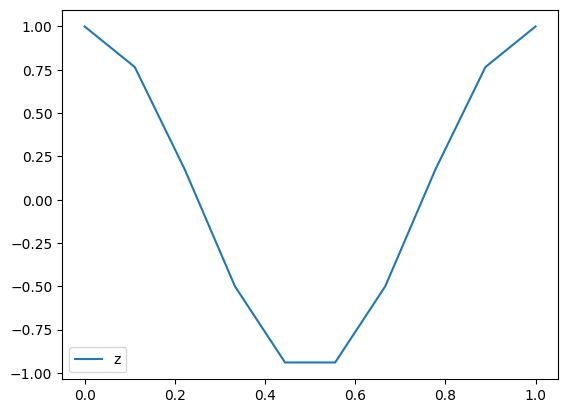

TypeError: loop of ufunc does not support argument 0 of type ComplexFloat which has no callable conjugate method

In [12]:
fig, ax = plt.subplots()
for name, metrics in result.metrics.items():
    ax.plot(result.times, metrics, label=name)
ax.legend()
plt.show()

rho = np.outer(result.state, np.conj(result.state))
fig, axs = plt.subplots(1, 2)
sns.heatmap(rho.real, ax=axs[0])
sns.heatmap(rho.imag, ax=axs[1])
for ax in axs:
    ax.set_aspect('equal')
plt.show()

In [13]:
provider = Provider()
job = provider.submit(task, backend="qutip")
print(job)

ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /submit/qutip (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DD324165F0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
# print(provider.check_status(job))
results = provider.retrieve_job(job)
pprint(results)

In [ ]:
from quantumion.backend.task import Task, TaskArgsDigital, TaskResultDigital
from quantumion.backend.digital.python.tc import TensorCircuitBackend

from quantumion.datastruct.digital.circuit import DigitalCircuit
from quantumion.datastruct.digital.gate import Gate, H, CNOT
from quantumion.datastruct.digital.statement import Statement, Measure, Barrier
from quantumion.datastruct.digital.register import QuantumRegister, ClassicalRegister

qreg = QuantumRegister(id='q', reg=2)
creg = ClassicalRegister(id='c', reg=2)

circ = DigitalCircuit(qreg=qreg, creg=creg)
circ.add(H(qreg=qreg[0]))
circ.add(CNOT(qreg=qreg[0:2]))
pprint(circ)

In [ ]:
args = TaskArgsDigital(n_shots=100)
task = Task(program=circ, args=args)

backend = TensorCircuitBackend()
result = backend.run(task)
pprint(result)

In [ ]:
fig, ax = plt.subplots()
x = list(result.counts.keys())
ax.bar(x=x, height=list(result.counts.values()))
ax.set(xticks=x)
fig.show()

rho = np.outer(result.state, np.conj(result.state))
fig, axs = plt.subplots(1, 2)
sns.heatmap(rho.real, ax=axs[0])
sns.heatmap(rho.imag, ax=axs[1])
for ax in axs:
    ax.set_aspect('equal')
fig.show()